# Bootstrapping  
diabete dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html  

target mean: 152.13348416289594
target std: 77.00574586945044


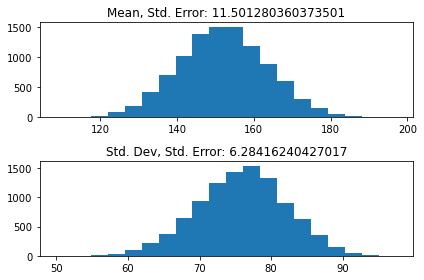

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()


target = diabetes.target

print('target mean: {}'.format(np.mean(target)))
print('target std: {}'.format(np.std(target)))

bootstrap_stats = []

for i in range(10000):
    bootstrap_sample = np.random.choice(target, size=int(len(target)/10))
    mean = np.mean(bootstrap_sample)
    std = np.std(bootstrap_sample)
    bootstrap_stats.append((mean, std))

bootstrap_stats = np.array(bootstrap_stats)


plt.figure()
plt.subplot(2,1,1)
std_err = np.std(bootstrap_stats[:,0])
plt.title('Mean, Std. Error: {}'.format(std_err))
plt.hist(bootstrap_stats[:,0], bins=20)

plt.subplot(2,1,2)
std_err = np.std(bootstrap_stats[:,1])
plt.title('Std. Dev, Std. Error: {}'.format(std_err))
plt.hist(bootstrap_stats[:,1], bins=20)
plt.tight_layout()
plt.show()

# Bagging  
make_classification: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html  
BaggingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [2]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
print(X.shape)
print(y)
clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0).fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

(100, 4)
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1]


In [4]:
from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics


digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]

ensemble_size = 30
ensemble = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                             n_estimators=ensemble_size,
                             oob_score=True)

ensemble.fit(train_x, train_y)

ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)

print('Bagging: {}'.format(ensemble_acc))

Bagging: 0.8686868686868687


In [4]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
import numpy as np

np.random.seed(1234)
diabetes = load_diabetes()
train_x, train_y = diabetes.data[:400], diabetes.target[:400]
test_x, test_y = diabetes.data[400:], diabetes.target[400:]


estimator = DecisionTreeRegressor(max_depth=6)
ensemble = BaggingRegressor(base_estimator=estimator,
                            n_estimators=10)

ensemble.fit(train_x, train_y)
ensemble_predictions = ensemble.predict(test_x)

estimator.fit(train_x, train_y)
single_predictions = estimator.predict(test_x)

ensemble_r2 = metrics.r2_score(test_y, ensemble_predictions)
ensemble_mse = metrics.mean_squared_error(test_y, ensemble_predictions)

single_r2 = metrics.r2_score(test_y, single_predictions)
single_mse = metrics.mean_squared_error(test_y, single_predictions)

print('Bagging r-squared: {}'.format(ensemble_r2))
print('Bagging MSE: {}'.format(ensemble_mse))
print('-'*30)
print('Decision Tree r-squared: {}'.format(single_r2))
print('Decision Tree MSE: {}'.format(single_mse))


Bagging r-squared: 0.5163657922013793
Bagging MSE: 2677.4957560485336
------------------------------
Decision Tree r-squared: 0.14501770368143274
Decision Tree MSE: 4733.35308581562


# Boosting  
adaboost: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [5]:
from sklearn.datasets import make_classification
from sklearn.ensemble import AdaBoostClassifier
X, y = make_classification(n_samples=1000, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X, y)
clf.predict([[0, 0, 0, 0]])
print(clf.score(X, y))

0.983


In [6]:
import numpy as np

from sklearn.datasets import load_digits
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
np.random.seed(1)

digits = load_digits()

train_size = 1500
train_x, train_y = digits.data[:train_size], digits.target[:train_size]
test_x, test_y = digits.data[train_size:], digits.target[train_size:]



ensemble_size = 2000
ensemble = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                              algorithm="SAMME",
                              n_estimators=ensemble_size)


ensemble.fit(train_x, train_y)


ensemble_predictions = ensemble.predict(test_x)

ensemble_acc = metrics.accuracy_score(test_y, ensemble_predictions)


print('Boosting: {}'.format(ensemble_acc))

Boosting: 0.8451178451178452


In [28]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
import numpy as np

diabetes = load_diabetes()

train_size = 400
train_x, train_y = diabetes.data[:train_size], diabetes.target[:train_size]
test_x, test_y = diabetes.data[train_size:], diabetes.target[train_size:]

np.random.seed(1)


ensemble_size = 2000
ensemble = AdaBoostRegressor(n_estimators=ensemble_size)


ensemble.fit(train_x, train_y)
predictions = ensemble.predict(test_x)

r2 = metrics.r2_score(test_y, predictions)
mse = metrics.mean_squared_error(test_y, predictions)

print('Gradient Boosting:')
print('R-squared: {}'.format(r2))
print('MSE: {}'.format(mse))

Gradient Boosting:
R-squared: 0.5682108119473204
MSE: 2390.471351852935


decision tree regression: https://www.google.com/url?sa=i&url=https%3A%2F%2Fheartbeat.fritz.ai%2Fimplementing-regression-using-a-decision-tree-and-scikit-learn-ac98552b43d7&psig=AOvVaw2YEVt2tLqQ9AN5SkPge1aC&ust=1593502823033000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCMj13-HCpuoCFQAAAAAdAAAAABAD  
decision tree regressor: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

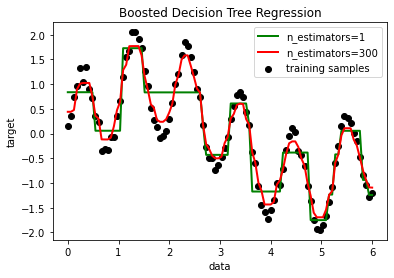

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

# create dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]

# np.newaxis 
# None
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# train regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# plot
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# XGBOOST  
XGBOOST theory ref: https://towardsdatascience.com/xgboost-python-example-42777d01001e  
install XGBOOST: pip install xgboost

In [52]:
import pandas as pd
import xgboost as xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [54]:
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [55]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=3,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [56]:
pd.DataFrame(regressor.feature_importances_.reshape(1, -1), columns=boston.feature_names)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.027685,0.005031,0.011579,0.066247,0.032304,0.141401,0.009469,0.047628,0.021234,0.02946,0.070498,0.011397,0.526066


In [57]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('r2: {}'.format(r2))
print('mse: {}'.format(mse))


r2: 0.8227049680188543
mse: 11.761302835987935


# Averaging  
ref: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
#read in the dataset
df = pd.read_csv('./dataset/diabetes_data.csv')

#take a look at the data
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
#check dataset size
df.shape

(768, 9)

In [33]:
#split data into inputs and targets
X = df.drop(columns = ['diabetes'])
y = df['diabetes']
#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [34]:
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
params_knn = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)
#fit model to training data
knn_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [35]:
#save best model
knn_best = knn_gs.best_estimator_

#check best n_neigbors value
print(knn_gs.best_params_)

{'n_neighbors': 20}


In [36]:
#create a new rf classifier
rf = RandomForestClassifier()

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200]}

#use gridsearch to test all values for n_estimators
rf_gs = GridSearchCV(rf, params_rf, cv=5)

#fit model to training data
rf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [37]:
#save best model
rf_best = rf_gs.best_estimator_

#check best n_estimators value
print(rf_gs.best_params_)

{'n_estimators': 100}


In [38]:
#test the three models with the test data and print their accuracy scores

print('knn: {}'.format(knn_best.score(X_test, y_test)))
print('rf: {}'.format(rf_best.score(X_test, y_test)))

knn: 0.7186147186147186
rf: 0.6883116883116883


In [39]:
#create a dictionary of our models
estimators=[('knn', knn_best), ('rf', rf_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

#fit model to training data
ensemble.fit(X_train, y_train)

#test our model on the test data
ensemble.score(X_test, y_test)

0.7142857142857143